# **Workshop #2**

### *EDA - `spotify` dataset*
---

## ***Setting the project directory***
This script attempts to change the current working directory to the specified path.
If the directory change fails due to the directory not being found, it prints a message indicating that the user is already in the correct directory.

In [1]:
import os

try:
    os.chdir("../../Workshop #2")
except FileNotFoundError:
    print("You are already in the correct directory.")

## ***Importing dependencies***

For this environment we are using:
* ***Pandas*** >= 2.2.2
* ***matplotlib*** >= 3.9.2
* ***seaborn*** >= 0.13.2

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

## ***Reading the data***

This code block is used to read the Spotify dataset through a CSV file named `spotify_dataset`. The file is loaded into a pandas DataFrame.

In [3]:
spotify_data = pd.read_csv("./data/raw/spotify_dataset.csv")
spotify_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


We delete the *Unnamed: 0* column because it's uncertain whether this column follows a proper sequence to be assigned as an index. Furthermore, we already have an appropriate index provided by Pandas when loading the dataframe.

In [4]:
df = spotify_data.drop(columns=["Unnamed: 0"])

## ***Data preparation***
---

### **Reviewing the dataset**

The Spotify dataset contains a total of 114.000 entries with 20 columns. Those columns contains the following information:

**String columns (object type):**
- `track_id`: Unique identifier for each track.
- `artists`: Names of the artists performing the track.
- `album_name`: The name of the album where the track is featured.
- `track_name`: The name of the track.
- `track_genre`: The genre of the track.

**Numerical columns (int64 type):**
- `popularity`: Popularity score of the track.
- `duration_ms`: Duration of the track in milliseconds.
- `key`: Musical key (represented numerically).
- `mode`: Mode of the track (major or minor).
- `time_signature`: Time signature of the track (e.g., 4/4).

**Boolean column (bool type):**
- `explicit`: Indicates if the track contains explicit content.

**Decimal columns (float64 type):**
- `danceability`: Represents how suitable the track is for dancing.
- `energy`: Energy level of the track, indicating its intensity and activity.
- `loudness`: General volume of the track (in decibels).
- `speechiness`: Measures the presence of spoken words in the track.
- `acousticness`: The likelihood that the track is acoustic.
- `instrumentalness`: Represents how instrumental the track is (with few or no vocals).
- `liveness`: Indicates the presence of an audience (if it is live).
- `valence`: Positivity or happiness of the track.
- `tempo`: The tempo of the track (in beats per minute).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

### **Null values**
Reviewing these null values, we see that 1 register in our dataframe contains null values (check the *artists* values). Let's see if that same register also contains null values in the *album_name* and *track_name* column.

In [6]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In fact, the record also contains a NaN value in the *album_name* and *track_name* columns. We see in the cell output that the record does not bring any value to our analysis. We can delete it.

In [7]:
df[df["artists"].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [8]:
df = (df
      .dropna()
      .reset_index(drop=True))

We can compare the totality of the records with the count of non-null values in each column: **observe that they have the same number**, meaning that there are no null values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

### **Duplicated Values**
The number of duplicate records that can be observed in the dataframe is 450.

In [10]:
duplicated_values = df.duplicated()
duplicated_values.sum()

np.int64(450)

In [11]:
df.loc[duplicated_values].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime


We proceed to delete the duplicate records.

In [12]:
df = df.drop_duplicates()
print(f"The number of rows in the dataset is {df.shape[0]} and the number of columns is {df.shape[1]}.")

The number of rows in the dataset is 113549 and the number of columns is 20.


#### **Duplicated records in track_id column**

However, remember that we are using an identifier (*track_id*) that identifies only one song. We can use this identifier to determine those songs that are duplicates, but that probably contain some other distinct details that prevent these records from having been previously deleted.

There, we can see that there are almost 23.000 records or songs that are duplicated.

In [13]:
df[df.duplicated(subset=["track_id"])].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4,alternative
3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,-5.509,0,0.0300,0.04840,0.000417,0.2860,0.370,93.986,4,alternative
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,4,alternative
3011,6rrKbzJGGDlSZgLphopS49,The Score,ATLAS,Unstoppable,73,192106,False,0.485,0.843,1,-3.993,0,0.0467,0.00129,0.000010,0.1400,0.602,78.001,4,alternative
3012,0AUyNF6iFxMNQsNx2nhtrw,grandson,Blood // Water,Blood // Water,75,216720,False,0.510,0.882,8,-5.659,0,0.1590,0.00158,0.002060,0.0764,0.653,154.029,4,alternative


We remove these duplicates and finally reset the index.

In [14]:
df = (df
      .drop_duplicates(subset=["track_id"])
      .reset_index(drop=True))

In the end, we were left with almost 89.000 records in our dataset.

In [15]:
df.shape

(89740, 20)

#### **Duplicated records in track_name and artists column**

Here, we identify duplicated records in the *track_name* and *artists* columns of the dataset by grouping the data and counting the occurrences of each unique combination. 

The result shows the duplicated records, where the same song and artist combination appear multiple times in the dataset. For example, "*Rockin' Around the Christmas Tree*" by *Brenda Lee* appears 45 times, making it the most duplicated entry.

In [16]:
song_artist_grouped = df.groupby(["track_name", "artists"])

grouped_counts = (song_artist_grouped
                  .size()
                  .reset_index(name="counts")
                  .sort_values(by="counts", ascending=False))

In [17]:
repeated_songs = grouped_counts.query("counts >= 1")
repeated_songs.head(10)

,track_name,artists,counts
55084,Rockin' Around The Christmas Tree,Brenda Lee,45
37981,Little Saint Nick - 1991 Remix,The Beach Boys,41
55570,Run Rudolph Run,Chuck Berry,40
23998,Frosty The Snowman,Ella Fitzgerald,34
37090,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,32
42561,Mistletoe,Justin Bieber,31
59376,Sleigh Ride,Ella Fitzgerald,30
30348,I Saw Mommy Kissing Santa Claus,The Jackson 5,27
64803,The Christmas Song (Merry Christmas To You),Nat King Cole,26
56426,Santa Claus Is Coming To Town,The Jackson 5,26


There are **3860 songs** that are repeated: we will try to reduce as many duplicates as possible without eliminating the most substantial and useful data for our analysis.

In [18]:
repeated_songs.shape

(81343, 3)

*The path to perform extensive cleanup of these duplicate records is as follows:*

##### **Duplicates with several identical columns**

In some cases we see that all duplicate records for certain songs only differ in the *track_id*, *track_genre* and *track_album*: these are the fields that cause the most problems when cleaning.

In [19]:
repeated_songs_data = df

In [20]:
repeated_songs_data.shape

(89740, 20)

In [21]:
repeated_songs_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Grouping of genders**

Although there are several records that differ in musical genre, this genre is part of a broader category. We will transform the values in this column into broader categories in order to facilitate the analysis of our data.

Before this, we look at the musical genres that are in our dataset.

In [22]:
repeated_songs_data["track_genre"].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

**Note:**

* In the genre mapping provided, the *Single Genre* category is used to group genres that did not fit neatly into the other broader categories defined. The intent behind this category is to group genres that are unique or do not share enough characteristics with other genres to be included in a more general category.

* In addition, the *Global Sounds* category is used to group musical genres that have their roots in different cultures and regions of the world. These genres are representative of global musical diversity and often incorporate traditional and folk elements from their respective cultures.

In [23]:
genre_mapping = {
    'Rock/Metal': [
        'alt-rock', 'alternative', 'black-metal', 'death-metal', 'emo', 'grindcore',
        'hard-rock', 'hardcore', 'heavy-metal', 'metal', 'metalcore', 'psych-rock',
        'punk-rock', 'punk', 'rock-n-roll', 'rock', 'grunge', 'j-rock', 'goth',
        'industrial', 'rockabilly', 'indie'
    ],
    
    'Pop': [
        'pop', 'indie-pop', 'power-pop', 'k-pop', 'j-pop', 'mandopop', 'cantopop',
        'pop-film', 'j-idol', 'synth-pop'
    ],
    
    'Electronic/Dance': [
        'edm', 'electro', 'electronic', 'house', 'deep-house', 'progressive-house',
        'techno', 'trance', 'dubstep', 'drum-and-bass', 'dub', 'garage', 'idm',
        'club', 'dance', 'minimal-techno', 'detroit-techno', 'chicago-house',
        'breakbeat', 'hardstyle', 'j-dance', 'trip-hop'
    ],
    
    'Urban': [
        'hip-hop', 'r-n-b', 'dancehall', 'reggaeton', 'reggae'
    ],
    
    'Latino': [
        'brazil', 'salsa', 'samba', 'spanish', 'pagode', 'sertanejo',
        'mpb', 'latin', 'latino'
    ],
    
    'Global Sounds': [
        'indian', 'iranian', 'malay', 'turkish', 'tango', 'afrobeat', 'french', 'german', 'british', 'swedish'
    ],
    
    'Jazz and Soul': [
        'blues', 'bluegrass', 'funk', 'gospel', 'jazz', 'soul', 'groove', 'disco', 'ska'
    ],
    
    'Varied Themes': [
        'children', 'disney', 'forro', 'kids', 'party', 'romance', 'show-tunes',
        'comedy', 'anime'
    ],
    
    'Instrumental': [
        'acoustic', 'classical',  'guitar', 'piano',
        'world-music', 'opera', 'new-age'
    ],
    
    'Mood': [
        'ambient', 'chill', 'happy', 'sad', 'sleep', 'study'
    ],
    
    'Single Genre': [
        'country', 'honky-tonk', 'folk', 'singer-songwriter'
    ]
}

We mapped the categories and integrated them into the *track_genre* column in place of the old musical genres.

In [24]:
genre_category_mapping = {genre: category for category, genres in genre_mapping.items() for genre in genres}

repeated_songs_data["track_genre"] = repeated_songs_data["track_genre"].map(genre_category_mapping)

In [25]:
repeated_songs_data["track_genre"].unique()

array(['Instrumental', 'Global Sounds', 'Rock/Metal', 'Mood',
       'Varied Themes', 'Jazz and Soul', 'Latino', 'Electronic/Dance',
       'Pop', 'Single Genre', 'Urban'], dtype=object)

**Keeping the first record found**

Now, we can drop the duplicated records that are similar in all the other columns except *track_id* and *album_name*. For such cases, we will only keep the first record found.

In [26]:
subset_cols = [col for col in repeated_songs_data.columns if col not in ["track_id", "album_name"]]

repeated_songs_data = repeated_songs_data.drop_duplicates(subset=subset_cols, keep="first")

repeated_songs_data.shape

(86066, 20)

We observe again how the duplicate records would look like in our dataset.

In [27]:
song_artist_grouped = repeated_songs_data.groupby(["track_name", "artists"])
song_artist_grouped

grouped_counts = (song_artist_grouped
                  .size()
                  .reset_index(name="counts")
                  .sort_values(by="counts", ascending=False))

In [28]:
repeated_songs = grouped_counts.query("counts > 1")
repeated_songs.head(10)

,track_name,artists,counts
53125,RUMBATÓN,Daddy Yankee,8
22385,Feliz Cumpleaños Ferxxo,Feid,8
24368,GATÚBELA,KAROL G;Maldy,8
27620,Heat Waves,Glass Animals,7
46121,Normal,Feid,7
66005,The Race Is On,George Jones,7
36663,Layla,DJ Robin;Schürze,6
74573,X ÚLTIMA VEZ,Daddy Yankee;Bad Bunny,6
27378,He Stopped Loving Her Today,George Jones,6
37595,Light Switch,Charlie Puth,6


##### **Duplicates with several different columns**

When looking at some of the remaining records we can see that there are other columns with different values, outside the *track_id* and *album_name*.

We can see here that there are several versions of the song. However, not all versions have the same popularity as the others. 

In this case, therefore, the strategy will be to take the 2 records with the highest popularity. That is, the 2 records closest to 100.

In [29]:
(repeated_songs_data
    .query('track_name == "Feliz Cumpleaños Ferxxo" & artists == "Feid"')
    .sort_values(by=["popularity"], ascending=False)
    .head(5))

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
57771,3kUq4sBcmxhnOtNysZ9yrp,Feid,Feliz Cumpleaños Ferxxo,Feliz Cumpleaños Ferxxo,87,156400,False,0.870,0.550,5,-5.537,1,0.0722,0.1020,0.0,0.293,0.566,95.019,4,Latino
57716,2CeKVsFFXG4QzA415QygGb,Feid,FELIZ CUMPLEAÑOS FERXXO TE PIRATEAMOS EL ÁLBUM,Feliz Cumpleaños Ferxxo,84,155960,False,0.865,0.573,5,-5.501,1,0.0678,0.0863,0.0,0.305,0.563,94.999,4,Latino
56944,08jXpbmBrMtXXAtXlHgsHh,Feid,Perreo en Halloween,Feliz Cumpleaños Ferxxo,8,155960,False,0.865,0.573,5,-5.501,1,0.0678,0.0863,0.0,0.305,0.563,94.999,4,Latino
56902,4SGpb5hFrz394Fp4LcXGgt,Feid,Feliz Cumpleaños con Perreo,Feliz Cumpleaños Ferxxo,7,155960,False,0.865,0.573,5,-5.501,1,0.0678,0.0863,0.0,0.305,0.563,94.999,4,Latino
56899,467COmJuCIz4s7sorVviYj,Feid,FELIZ CUMPLEAÑOS,Feliz Cumpleaños Ferxxo,5,155960,False,0.865,0.573,5,-5.501,1,0.0678,0.0863,0.0,0.305,0.563,94.999,4,Latino


**The most popular record**

Here, we perform a series of operations on the dataFrame:

1. **Sort by Popularity**: First, it sorts the data by the column *popularity*, in descending order.

2. **Group by Song Name and Artists**: Then, it groups the data by the columns *track_name*, and *artists*.

3. **Select the most popular song of each group**: Then, we select the first row of each group.

4. **Sort by Index**: Then, we sort the data by the dataframe index.

5. **Restart the Index**: Finally, it will reset the index of the DataFrame, removing the previous index.

In [30]:
repeated_songs_data = (repeated_songs_data
                       .sort_values(by="popularity", ascending=False)
                       .groupby(["track_name", "artists"])
                       .head(1)
                       .sort_index()
                       .reset_index(drop=True))

In [31]:
repeated_songs_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,Instrumental
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,Instrumental
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,Instrumental
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,Instrumental
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,Instrumental


Assign `repeated_songs_data` to `df`, that is, as the main dataframe.

In [32]:
df = repeated_songs_data

After the data preparation process, our dataframe counts now with near 81.000 entries.

In [33]:
df.shape

(81343, 20)

### **Song duration**

#### **Milliseconds to minutes only**

In this block we intend to transform the format of the song duration column: we change it from milliseconds, an unintelligible format, to minutes only, which will facilitate the analysis of the duration data.

The conversion is performed by applying a lambda function to each column value, which consists of a conversion from milliseconds to minutes by dividing by 60,000 (since there are 60,000 milliseconds in a minute). By using the `//` operator we guarantee that the result is exact, i.e. **an integer**.

In [34]:
df["duration_min"] = (df["duration_ms"]
                      .apply(lambda x: f"{x // 60000}"))

The result of this conversion is a string formatted as `"minutes"` for each value in `duration_ms`.

In [35]:
df[["duration_ms", "duration_min"]].head(10)

,duration_ms,duration_min
0,230666,3
1,149610,2
2,210826,3
3,201933,3
4,198853,3
5,214240,3
6,229400,3
7,242946,4
8,189613,3
9,205594,3


#### **Grouping the song duration into categories**

We are going to create three categories:

* **Short**: Songs with a duration less than 2,5 minutes (150.000 ms).
* **Average**: Songs with a duration between 2,5 minutes (150.000 ms) and 5 minutes (300.000 ms).
* **Long**: Songs with a duration longer than 5 minutes (300.000 ms).

In [36]:
def categorize_duration(duration_ms):
    if duration_ms < 150000:
        return "Short"
    elif 150000 <= duration_ms <= 300000:
        return "Average"
    else:
        return "Long"

df["duration_category"] = df["duration_ms"].apply(categorize_duration)

df[["duration_ms", "duration_category"]].head()

,duration_ms,duration_category
0,230666,Average
1,149610,Short
2,210826,Average
3,201933,Average
4,198853,Average


### **Grouping popularity into categories**


Following the same approach as the previous section, we will group popularity into categories to make the graphs more readable and to facilitate filtering of the songs.

**Popularity scores are grouped into three categories:**

* **Low**: Scores ranging from 0 to 30.
* **Medium**: Scores from 31 to 70.
* **High**: Scores from 71 to 100.

In [37]:
def categorize_popularity(popularity):
    if popularity <= 30:
        return "Low Popularity"
    elif 31 <= popularity <= 70:
        return "Average Popularity"
    else:
        return "High Popularity"

df["popularity_category"] = df["popularity"].apply(categorize_popularity)

df[["popularity", "popularity_category"]].head()

,popularity,popularity_category
0,73,High Popularity
1,55,Average Popularity
2,57,Average Popularity
3,71,High Popularity
4,82,High Popularity


### **Determining track_mood based on the valence column**

The `valence` column in the dataset represents the musical positiveness of a track. It ranges from 0 to 1, where a lower valence value represents a more negative or sad mood, and a higher valence value represents a more positive or happy mood. Based on this, we will create a new column `track_mood` that assigns a mood category to each track.

**Categories for `track_mood`:**

- **Sad**: Tracks with a `valence` value between 0 and 0,3.
- **Neutral**: Tracks with a `valence` value between 0,31 and 0,6.
- **Happy**: Tracks with a `valence` value between 0,61 and 1,0.

In [38]:
def determine_mood(valence):
    if valence <= 0.3:
        return "Sad"
    elif 0.31 <= valence <= 0.6:
        return "Neutral"
    else:
        return "Happy"

df["track_mood"] = df["valence"].apply(determine_mood)

df[["valence", "track_mood"]].head()

,valence,track_mood
0,0.715,Happy
1,0.267,Sad
2,0.120,Sad
3,0.143,Sad
4,0.167,Sad


### **Creating a live_performance column**

According to the dataset description, those songs whose songs have a value greater than 0.8 have a very high probability of having been recorded live. To simplify our analysis of these songs we will create a table with boolean values that determine whether the song was live or not.

In [39]:
df["live_performance"] = df["liveness"] > 0.8

This value will be used to create a small count in the dashboard, but, as we can see in the graph, the number of songs that were recorded live are very few.

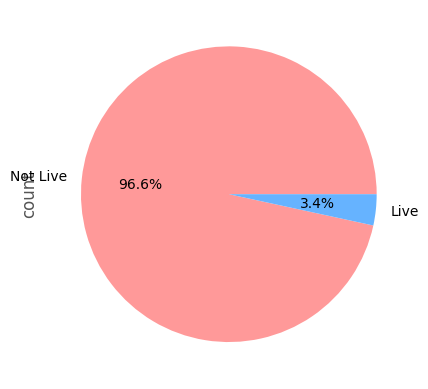

In [40]:
live_counts = df["live_performance"].value_counts()

live_counts.plot(kind="pie",
                 autopct="%1.1f%%",
                 labels=["Not Live", "Live"],
                 colors=["#ff9999", "#66b3ff"])

plt.show()

### **Dropping speechiness, acousticness, and instrumentalness columns**

Before removing these columns, let's review their distributions to ensure we understand their impact on the dataset. We are going to examine how these features are spread out across the dataset.

In [41]:
def sns_colors(color):
    return sns.color_palette(color)[3]

As observed in the three graphs, there is a higher concentration of values near 0. The fact that the values in these columns have this tendency prevents them from containing any significant values in our analysis.

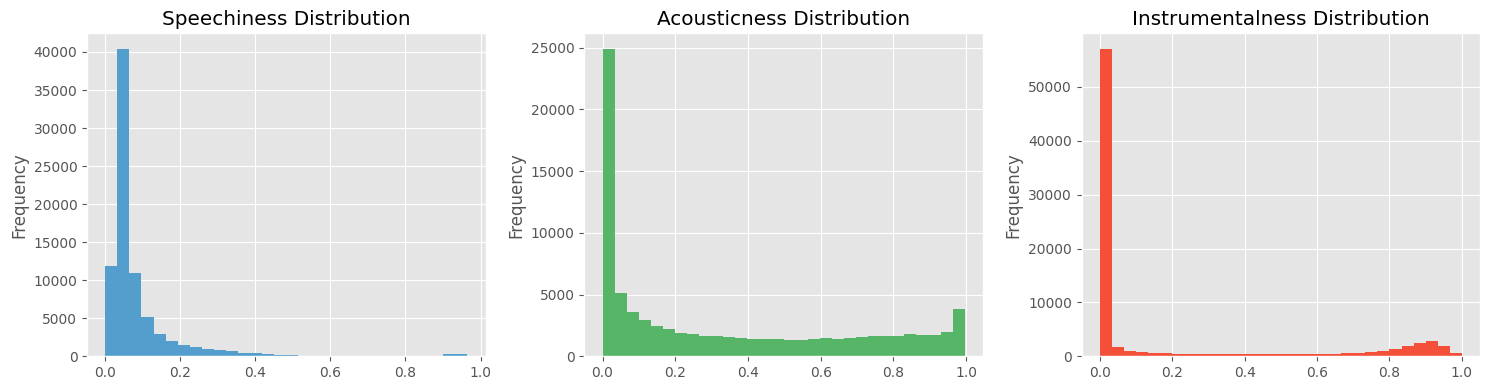

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Speechiness
df["speechiness"].plot(kind="hist", bins=30, ax=axes[0], color=sns_colors("Blues"), title="Speechiness Distribution")

# Acousticness
df["acousticness"].plot(kind="hist", bins=30, ax=axes[1], color=sns_colors("Greens"), title="Acousticness Distribution")

# Instrumentalness
df["instrumentalness"].plot(kind="hist", bins=30, ax=axes[2], color=sns_colors("Reds"), title="Instrumentalness Distribution")

plt.tight_layout()
plt.show()

Here are also the 10 songs with the highest scores in these three measures. 

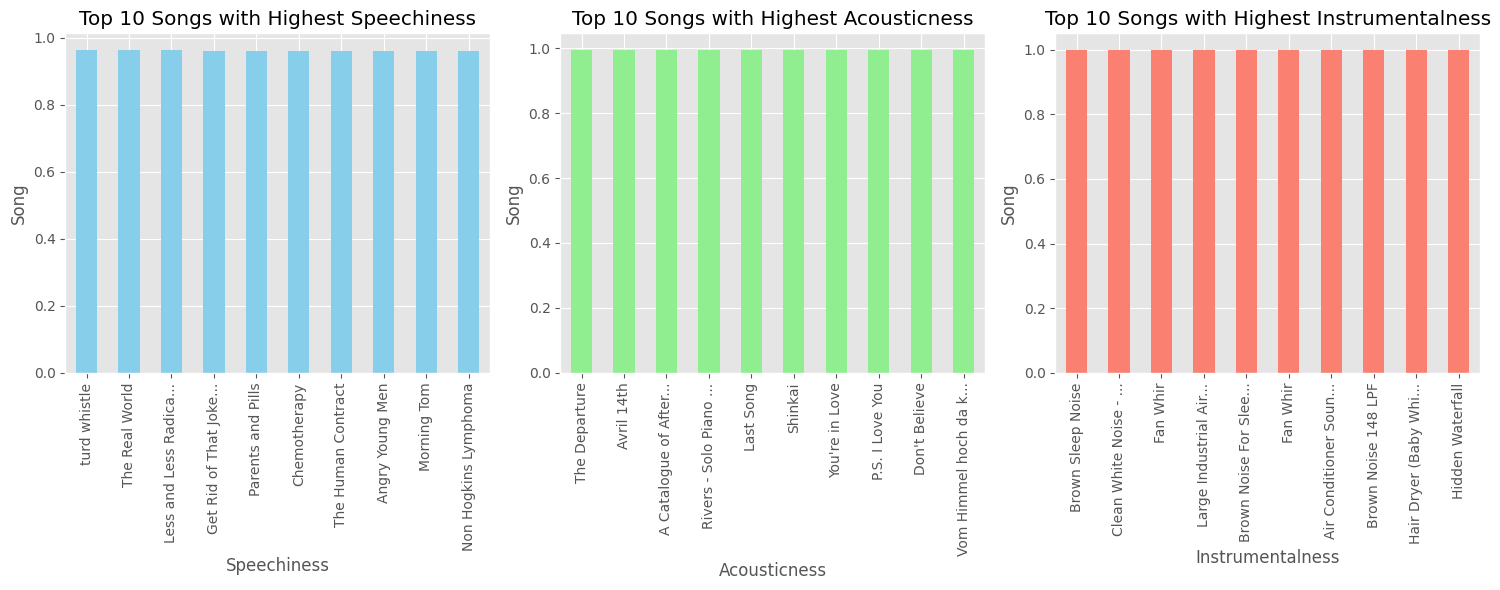

In [43]:
def shorten_title(title, max_length=20):
    if len(title) > max_length:
        return title[:max_length] + '...'
    return title

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Top 10 songs with highest speechiness
top_speechiness = df.nlargest(10, "speechiness")
top_speechiness["short_track_name"] = top_speechiness["track_name"].apply(shorten_title)
top_speechiness.plot(kind="bar", x="short_track_name", y="speechiness", ax=axes[0], color="skyblue", legend=False)
axes[0].set_title("Top 10 Songs with Highest Speechiness")
axes[0].set_xlabel("Speechiness")
axes[0].set_ylabel("Song")

# Top 10 songs with highest acousticness
top_acousticness = df.nlargest(10, "acousticness")
top_acousticness["short_track_name"] = top_acousticness["track_name"].apply(shorten_title)
top_acousticness.plot(kind="bar", x="short_track_name", y="acousticness", ax=axes[1], color="lightgreen", legend=False)
axes[1].set_title("Top 10 Songs with Highest Acousticness")
axes[1].set_xlabel("Acousticness")
axes[1].set_ylabel("Song")

# Top 10 songs with highest instrumentalness
top_instrumentalness = df.nlargest(10, "instrumentalness")
top_instrumentalness["short_track_name"] = top_instrumentalness["track_name"].apply(shorten_title)
top_instrumentalness.plot(kind="bar", x="short_track_name", y="instrumentalness", ax=axes[2], color="salmon", legend=False)
axes[2].set_title("Top 10 Songs with Highest Instrumentalness")
axes[2].set_xlabel("Instrumentalness")
axes[2].set_ylabel("Song")

plt.tight_layout()
plt.show()

In [44]:
df = df.drop(columns=["speechiness", "acousticness", "instrumentalness"])

### **Dropping other columns**
The following columns that we are going to drop aren't useful for the analysis.

In [45]:
df = df.drop(columns=["mode", "duration_ms", "key", "tempo", "valence", "liveness", "time_signature"])

In [46]:
df.head(4)

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,loudness,track_genre,duration_min,duration_category,popularity_category,track_mood,live_performance
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,-6.746,Instrumental,3,Average,High Popularity,Happy,False
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,-17.235,Instrumental,2,Short,Average Popularity,Sad,False
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,-9.734,Instrumental,3,Average,Average Popularity,Sad,False
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,-18.515,Instrumental,3,Average,High Popularity,Sad,False


## ***Data understanding***
### *The key to make a popular song*
---

What artist does not pursue fame and recognition? 
What manager or executive does not want a few sums of money from the work of his or her artists?

In these times when statistics and metrics chase us, it's key to know what makes a song popular. However, keep in mind that many of the trends observed for the most popular songs can be observed for the vast majority of popularity categories.

#### **Choosing the most popular songs**

Songs with high popularity will be chosen and different aspects of them will be analyzed. First, we must know how popularity is distributed in our dataset.

With this result we can determine that the songs with high popularity that exist in our dataset are very few. This will facilitate the correlation analysis between the different variables.

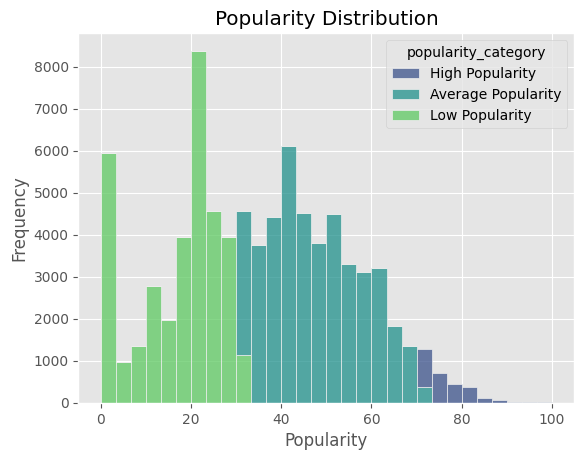

In [47]:
sns.histplot(data=df, x="popularity", hue="popularity_category", bins=30, multiple="stack", palette="viridis")

plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Frequency")

plt.show()

---
We select the most popular songs based on the category that each song has.

In [48]:
def color_palette(df):
    n_colors = len(df)
    return sns.color_palette("light:#5A9", n_colors=n_colors)

In [49]:
popular_songs = (df
                 .query('popularity_category == "High Popularity"')
                 .reset_index(drop=True)
                 .sort_values(by="popularity", ascending=False))

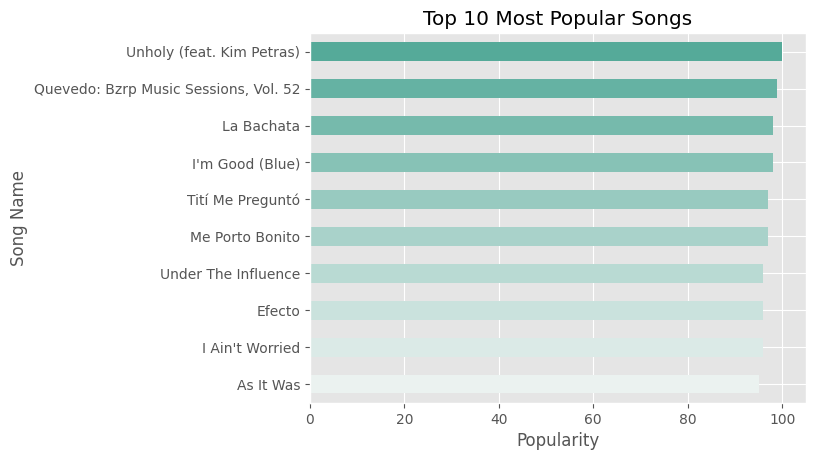

In [50]:
popular_barh = (popular_songs
                .head(10)
                .sort_values(by="popularity"))

(
popular_barh
 .plot(kind="barh",
       x="track_name",
       y="popularity",
       color=color_palette(popular_barh),
       legend=False)
 )

plt.title("Top 10 Most Popular Songs")
plt.xlabel("Popularity")
plt.ylabel("Song Name")

plt.show()

#### **How loud do you have to be?**

We can observe that most popular songs have loudness levels ranging between approximately -10 dB and -2.5 dB. This suggests that the trend in popular music is to maintain high volume levels, maximizing the auditory impact without distorting or sacrificing sound quality.

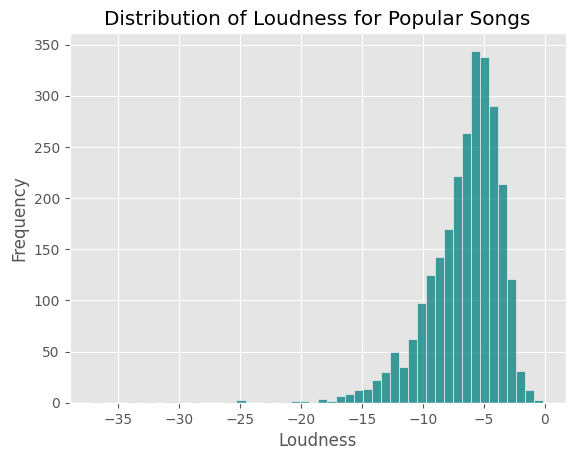

In [51]:
sns.histplot(data=popular_songs, x="loudness", multiple="stack", color="teal", bins=50)

plt.title("Distribution of Loudness for Popular Songs")
plt.xlabel("Loudness")
plt.ylabel("Frequency")

plt.show()

#### **How long in duration should it be?**

Popular songs are predominantly 2 to 4 minutes in length, with some 5-minute songs being a significant minority.

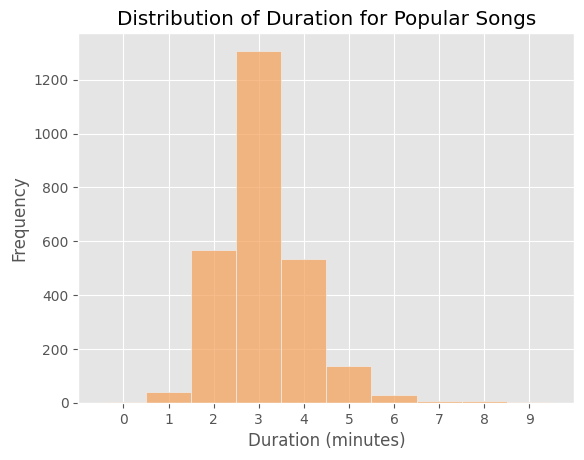

In [52]:
popular_duration_hist = popular_songs.sort_values(by="duration_min")

sns.histplot(data=popular_duration_hist, x="duration_min", multiple="stack", color="sandybrown", bins=20)

plt.title("Distribution of Duration for Popular Songs")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")

plt.show()

This is the duration distribution for the whole dataset: as we can see, it keeps the pattern of the previous graph.

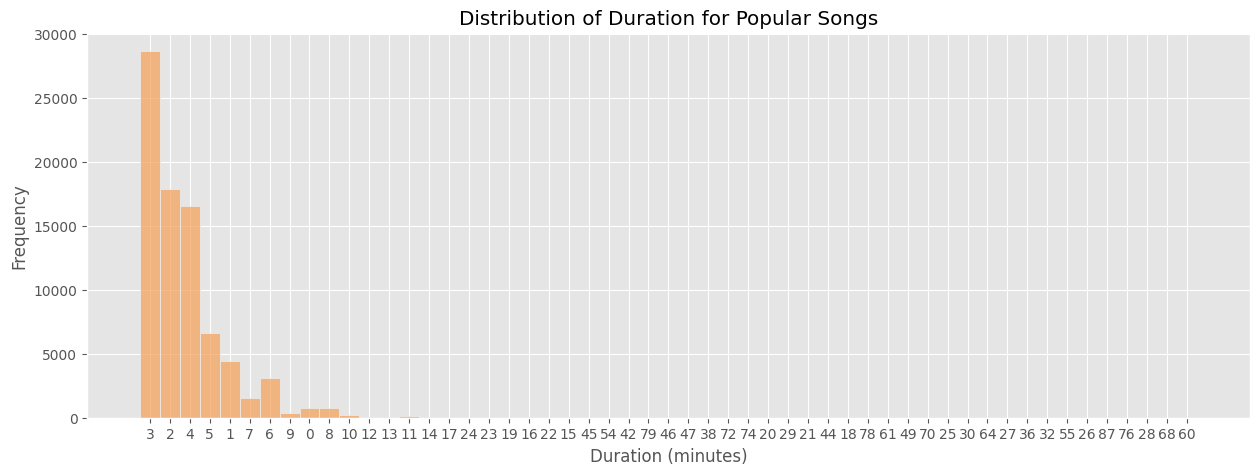

In [53]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df, x="duration_min", multiple="stack", color="sandybrown", bins=100)

plt.title("Distribution of Duration for Popular Songs")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")

plt.show()

#### **How danceable and energetic can the song be?**

Boxplots will be used to plot the ranges in which the songs vary between these two variables.

From the boxplots, we can conclude that:

* Regarding **danceability**, the median is around 0.65, indicating that most songs have a moderate to high level of danceability. However, there are several outliers below 0.2, suggesting that some songs are significantly less danceable than the majority.

* For **energy**, the median is close to 0.7, meaning that songs tend to be energetic. However, the distribution of energy is wider compared to that of danceability, showing greater variability and dispersion in energy levels across the songs. This contrasts with the more consistent distribution of danceability. Similar to danceability, there are also outliers in energy, but in this case, they are below 0.15.

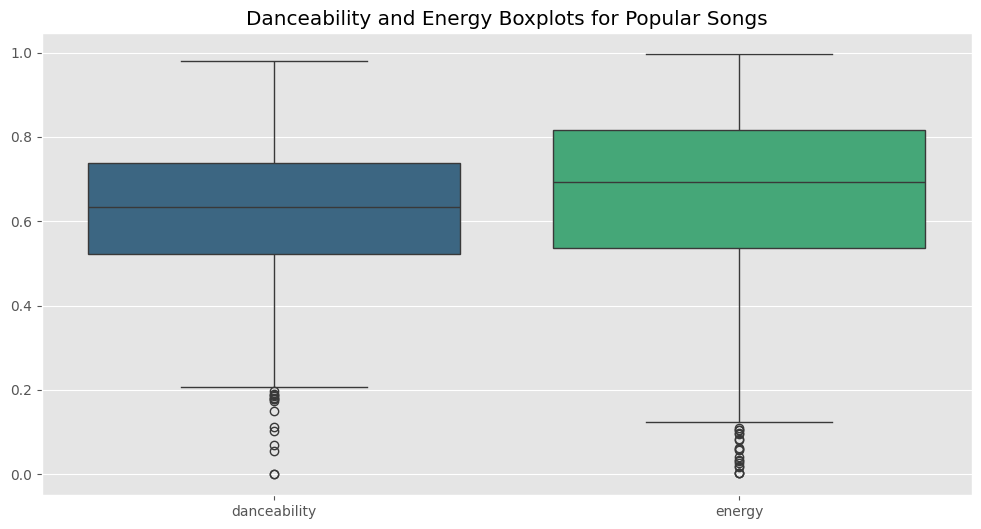

In [54]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=popular_songs[["danceability", "energy"]], palette="viridis")

plt.title("Danceability and Energy Boxplots for Popular Songs")

plt.show()

#### **What would be the relationship between the mood of the song and the energy and danceability?**

Here, a scatter plot is used, where each song's mood is represented by different colors (**Sad, Neutral, Happy**), to observe how these aspects interact with each other and how *danceability* and *energy* vary according to mood.

In the scatter plot, we can observe that songs with different moods tend to distribute differently based on their energy and danceability:

- **Sad** songs are mostly concentrated in areas with **lower** energy and **lower** danceability.
- **Neutral** songs are more **spread out**, though many tend to have **medium** levels of both energy and danceability.
- **Happy** songs tend to cluster in the **upper-right** corner, indicating they generally have **higher** energy and **higher** danceability.

Additionally, there is a higher density of points in the region where both *energy* and *danceability* are in the mid-to-high range, indicating that, regardless of mood, many songs tend to have moderate levels of both attributes.

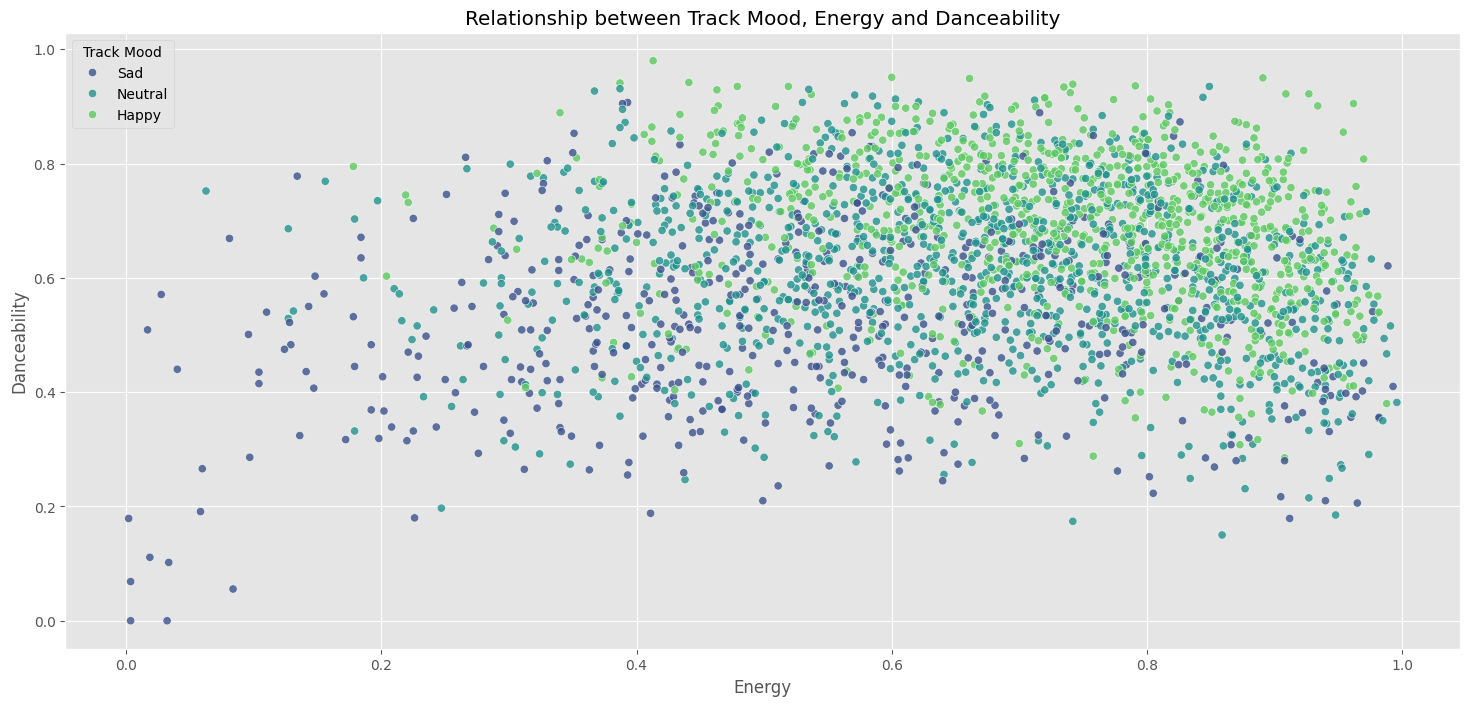

In [55]:
plt.figure(figsize=(18, 8))

sns.scatterplot(data=popular_songs, x="energy", y="danceability", hue="track_mood", palette="viridis", alpha=0.8)

plt.title("Relationship between Track Mood, Energy and Danceability")
plt.xlabel("Energy")
plt.ylabel("Danceability")

plt.legend(title="Track Mood")

plt.show()

## ***Conclusions***
---

- **Data Cleaning**:
    - Removed unnecessary columns such as `Unnamed: 0`, `speechiness`, `acousticness`, `instrumentalness`, `mode`, `duration_ms`, `key`, `tempo`, `valence`, `liveness`, and `time_signature`.
    - Eliminated duplicate records based on `track_id` and other criteria, reducing the dataset to approximately 81,000 entries.
    - Grouped musical genres into broader categories to facilitate analysis.

- **Data Transformations**:
    - Created a `duration_min` column to convert song duration from milliseconds to minutes.
    - Categorized songs into `Short`, `Average`, and `Long` based on their duration.
    - Grouped songs into popularity categories (`Low`, `Average`, `High`).
    - Determined the mood of the songs (`Sad`, `Neutral`, `Happy`) based on the `valence` column.
    - Created a `live_performance` column to identify songs recorded live.

- **Popularity Analysis**:
    - The most popular songs tend to have high volume levels, ranging from -10 dB to -2.5 dB.
    - Most popular songs have a duration between 2 and 4 minutes.
    - Popular songs show high variability in terms of `danceability` and `energy`, with medians around 0.65 and 0.7, respectively.
    - Happy songs tend to be more energetic and danceable, while sad songs have lower levels in both metrics.

- **Visualizations**:
    - Histograms were used to analyze the distribution of song popularity, duration, and volume levels.
    - Boxplots were employed to visualize the variability in `danceability` and `energy`.
    - A scatter plot was created to observe the relationship between the mood of the songs and their levels of `energy` and `danceability`.